In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
from datetime import datetime
import math

In [5]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.1.3


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [7]:
example = pd.read_csv('example_1.csv', parse_dates=['time'], index_col='time', squeeze = True)

In [8]:
example.head()

time
1979-01-01    4419
1979-02-01    4336
1979-03-01    4214
1979-04-01    4294
1979-05-01    4650
Name: value, dtype: int64

In [9]:
def train_test_split(data, n_test):
    train, test = data[0:-n_test], data[-n_test:]
    return train, test

In [10]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is pd.Series else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [11]:
# transform series into train and test sets for supervised learning
def prepare_data(series, n_lag, n_seq):
    # extract raw values
    raw_values = series.values
    raw_values = raw_values.reshape(len(raw_values), 1)
    # rescale values to -1, 1
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_values = scaler.fit_transform(raw_values)
    scaled_values = scaled_values.reshape(len(scaled_values), 1)
    # transform into supervised learning problem X, y
    supervised = series_to_supervised(scaled_values, n_lag, n_seq)
    supervised_values = supervised.values
    
    train = supervised_values
    return scaler, train

In [12]:
from __future__ import print_function

from hyperopt import Trials, STATUS_OK, tpe
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

from hyperas import optim
from hyperas.distributions import choice, uniform, conditional

In [13]:
n_lag = 6
n_seq = 18

In [14]:
def create_data(series, n_lag, n_seq):    
    
    train1, test = train_test_split(series, 18)
    scaler, train = prepare_data(train1, n_lag, n_seq)
    
    val_size = int(train.shape[0]*0.2)
    train, val = train[0:-val_size, :], train[-val_size: , :]
    # reshape training into [samples, timesteps, features]
    trainX, trainy = train[:, 0:n_lag], train[:, n_lag:]
    # reshape validation data into [samples, timesteps, features]
    valX, valy = val[:, 0:n_lag], val[:, n_lag:]
      
    trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
    valX = valX.reshape(valX.shape[0], valX.shape[1], 1)
    
    return trainX, trainy, valX, valy

In [15]:
def fit_lstm(trainX, trainy, valX, valy):    
    
    model = Sequential()
    model.add(LSTM({{choice([6, 12, 20, 25])}}, batch_input_shape=(n_batch, trainX.shape[1], 1), stateful=True))
    #model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    #model.add(LSTM(64, stateful = True, dropout=0.2, activation = 'relu'))
    model.add(Dense(trainy.shape[1]))
    model.compile(loss='mean_squared_error', optimizer= 'adam')
    # fit network
    for i in range({{choice([10, 20, 40])}}):
        model.fit(trainX, trainy, epochs= 2, batch_size=n_batch, validation_data = (valX, valy), verbose=2, shuffle=False)
        model.reset_states()
        
    val_loss = model.evaluate(x_test, y_test, verbose=0)
    return {'loss': val_loss,'status': STATUS_OK, 'model': model}

In [20]:

    
X_train, Y_train, X_test, Y_test = create_data(example, n_lag, n_seq)

best_run, best_model = optim.minimize(model=fit_lstm,
                                      data=create_data,
                                      algo=tpe.suggest,
                                      max_evals=5,
                                      trials=Trials(),
                                      notebook_name='Example_LSTM+Project-Final-Hyper_Tuning_Hyperopt')

print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, Y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)

C:\Users\adars\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


>>> Imports:
#coding=utf-8

try:
    import numpy as np
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    from matplotlib import pylab
except:
    pass

try:
    from datetime import datetime
except:
    pass

try:
    import math
except:
    pass

try:
    import keras
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import Dense
except:
    pass

try:
    from keras.layers import LSTM
except:
    pass

try:
    from keras.layers import Flatten
except:
    pass

try:
    from sklearn.preprocessing import MinMaxScaler
except:
    pass

try:
    from sklearn.metrics import mean_squared_error
except:
    pass

from __future__ import print_function

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from keras.datasets import mnist
except:
    pass

try:
    from keras.layers.core import Dense, Dropout, Activation
except

TypeError: object of type 'NoneType' has no len()

In [16]:
def forecast_lstm(model, X, n_batch):
    X = X.reshape(1, len(X), 1)
    forecast = model.predict(X, batch_size=n_batch, verbose=2)
    #model.reset_states()
    return [x for x in forecast[0, :]]

In [17]:
def make_forecasts(model, n_batch, points, n_lag, n_seq):
    forecasts = list()
    X = points[-1][len(points[-1])- n_lag:]
    forecast = forecast_lstm(model, X, n_batch)
    forecasts.append(forecast)
    return forecasts

In [18]:
def inverse_transform(forecasts, scaler):
    inverted = list()
    for i in range(len(forecasts)):
        forecast = np.array(forecasts[i])
        forecast = forecast.reshape(1, len(forecast))
        inv_scale = scaler.inverse_transform(forecast)
        inv_scale = inv_scale[0, :]
        inverted.append(inv_scale)
    return inverted

In [93]:
n_lag = 6
n_seq = 18
n_batch = 1
nb_epoch = 10
neurons = 20

In [7]:
lstm_data = pd.read_csv('LSTM_M3_Monthly.csv', parse_dates=['time'], index_col='time')

In [8]:
def LstmDict(lstm_data):
    lstm_dict={}
    keys = list(lstm_data.batchID.unique())

    for i in keys:
    
        value=[]
        value=lstm_data[lstm_data.batchID == i]
        value = value.drop(['batchID'], axis =1).squeeze()
        lstm_dict[i]=value
    
    return lstm_dict

In [27]:
Lstm_errors = {}
keys = list(LstmDict(lstm_data).keys())
#LstmDict(lstm_data)['N2780']

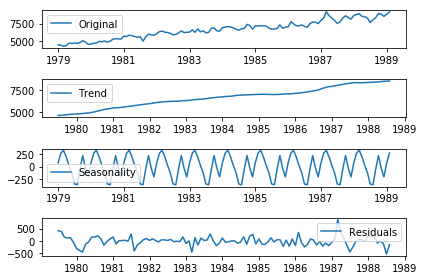

In [53]:

#log_train1 = log_transform(train1)
#data_diff = train1.diff().dropna()from stldecompose import decompose, forecast
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

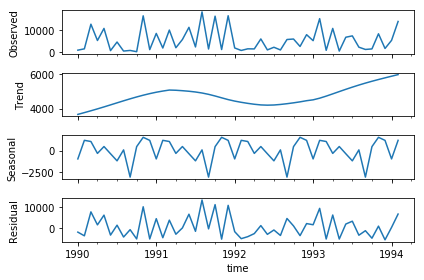

In [20]:
train1, test = train_test_split(LstmDict(lstm_data)['N1413'], 18)
#log_train1 = log_transform(train1)
#data_diff = train1.diff().dropna()from stldecompose import decompose, forecast
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)


stl = decompose(train1, period=12)
seas = stl.seasonal
tr = stl.trend
res = stl.resid
stl.plot()
plt.show()

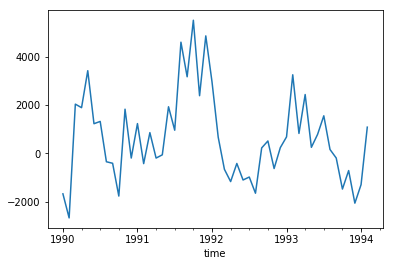

In [22]:
res = res.ewm(alpha = 0.3).mean()
res.plot()
plt.show()

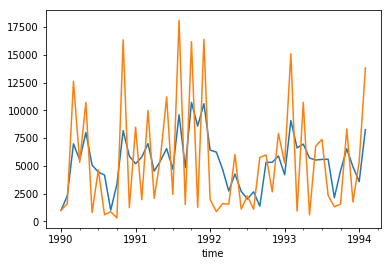

In [24]:
(tr + seas + res).plot()
train1.plot()
plt.show()

In [94]:
for batch in keys[0:200]:
    
    train1, test = train_test_split(LstmDict(lstm_data)[batch], 18)
#     decomposition = seasonal_decompose(train1)
#     seasonal = decomposition.seasonal
#     obs = train1-seasonal

#     if test_for_stationarity(obs) > 0.05:

#         data_diff = obs.diff().dropna()
#         scaler, train = prepare_data(obs, n_lag, n_seq)
#         #n_batch_train = train.shape[0]
#         model, new_model = fit_lstm(train, n_lag, n_seq, n_batch_pred, nb_epoch, neurons)
#         forecasts = make_forecasts(new_model, n_batch_pred, train, n_lag, n_seq)
#         forecasts = inverse_transform(forecasts, scaler)
#         forecast = forecasts[0].tolist()
#         forecast = inverse_difference(obs, forecast)

#     else:
    scaler, train = prepare_data(train1, n_lag, n_seq)
    #n_batch_train = train.shape[0]
    model= fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, neurons)
    forecasts = make_forecasts(model, n_batch, train, n_lag, n_seq)
    forecasts = inverse_transform(forecasts, scaler)
    forecast = forecasts[0].tolist()    
    #forecast = np.exp(forecast)
    error_mape = []
    error_mape = evaluate_forecasts(test, forecast, n_lag, n_seq)
    Lstm_errors[batch] = error_mape

Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 3s - loss: 102.2732 - val_loss: 100.8863
Epoch 2/2
 - 0s - loss: 99.9297 - val_loss: 100.9631
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 98.8236 - val_loss: 101.3970
Epoch 2/2
 - 0s - loss: 97.9050 - val_loss: 102.2249
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 97.6483 - val_loss: 102.0645
Epoch 2/2
 - 0s - loss: 97.2841 - val_loss: 101.5605
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 97.0014 - val_loss: 101.5059
Epoch 2/2
 - 0s - loss: 97.2904 - val_loss: 102.5554
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.7660 - val_loss: 102.0075
Epoch 2/2
 - 0s - loss: 97.2210 - val_loss: 102.0272
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.3433 - val_loss: 102.0292
Epoch 2/2
 - 0s - loss: 96.0218 - val_loss: 101.5982
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.0974 - val_loss: 101.7482
Epoch 2/2

 - 0s - loss: 83.4558 - val_loss: 80.7883
Epoch 2/2
 - 0s - loss: 84.8648 - val_loss: 81.7873
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 83.8387 - val_loss: 81.0354
Epoch 2/2
 - 0s - loss: 85.3312 - val_loss: 82.0137
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 84.6736 - val_loss: 83.7795
Epoch 2/2
 - 0s - loss: 84.0767 - val_loss: 83.7047
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 85.0817 - val_loss: 83.8984
Epoch 2/2
 - 0s - loss: 83.9767 - val_loss: 85.3919
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 83.7505 - val_loss: 82.4489
Epoch 2/2
 - 0s - loss: 83.5747 - val_loss: 81.7353
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 84.0381 - val_loss: 84.8254
Epoch 2/2
 - 0s - loss: 85.1346 - val_loss: 85.6706
MAPE:  213.6395243025414
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 2s - loss: 2084882.7934 - val_loss: 1678274.2250
Epoch 2/2
 - 0s - loss: 1904115.6523 - va

 - 0s - loss: 287709.4923 - val_loss: 98.6358
Epoch 2/2
 - 0s - loss: 255230.5617 - val_loss: 100.1190
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 342951.7573 - val_loss: 99.2871
Epoch 2/2
 - 0s - loss: 299852.5547 - val_loss: 100.5314
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 255676.4436 - val_loss: 98.9915
Epoch 2/2
 - 0s - loss: 323383.1582 - val_loss: 99.2546
MAPE:  32.90830938880524
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 4s - loss: 101.3558 - val_loss: 97.3824
Epoch 2/2
 - 0s - loss: 98.7189 - val_loss: 95.1207
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.4095 - val_loss: 92.2473
Epoch 2/2
 - 0s - loss: 96.0336 - val_loss: 89.9341
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.5004 - val_loss: 87.7747
Epoch 2/2
 - 0s - loss: 93.3043 - val_loss: 88.6146
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 88.8126 - val_loss: 91.4305
Epoch 2/2
 - 0s - loss: 

Epoch 2/2
 - 0s - loss: 96.7621 - val_loss: 98.2273
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 93.9926 - val_loss: 96.9888
Epoch 2/2
 - 0s - loss: 93.2969 - val_loss: 97.1678
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 93.9536 - val_loss: 97.5082
Epoch 2/2
 - 0s - loss: 94.3776 - val_loss: 98.1356
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 93.4569 - val_loss: 99.0406
Epoch 2/2
 - 0s - loss: 93.2083 - val_loss: 98.7478
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 93.0867 - val_loss: 99.0058
Epoch 2/2
 - 0s - loss: 94.2944 - val_loss: 97.8146
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 92.7405 - val_loss: 96.5910
Epoch 2/2
 - 0s - loss: 92.1777 - val_loss: 97.4498
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 92.4420 - val_loss: 98.6626
Epoch 2/2
 - 0s - loss: 91.3949 - val_loss: 96.5790
Train on 22 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss:

 - 0s - loss: 86.7719 - val_loss: 103.3875
Epoch 2/2
 - 0s - loss: 85.6678 - val_loss: 101.7164
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 84.6072 - val_loss: 101.3521
Epoch 2/2
 - 0s - loss: 84.5650 - val_loss: 100.4157
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 83.4279 - val_loss: 97.4947
Epoch 2/2
 - 0s - loss: 85.0720 - val_loss: 89.4583
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 83.1849 - val_loss: 98.5488
Epoch 2/2
 - 0s - loss: 83.0316 - val_loss: 96.9270
MAPE:  229.27509788172023
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 5s - loss: 98.8767 - val_loss: 96.7677
Epoch 2/2
 - 0s - loss: 89.7186 - val_loss: 87.6048
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 81.0472 - val_loss: 79.3589
Epoch 2/2
 - 0s - loss: 72.6162 - val_loss: 74.4517
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 69.0354 - val_loss: 76.0102
Epoch 2/2
 - 0s - loss: 68.0545 - val_loss: 76

Epoch 2/2
 - 0s - loss: 556979.4017 - val_loss: 1968738.9858
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 403786.8508 - val_loss: 1727097.8682
Epoch 2/2
 - 0s - loss: 284936.2631 - val_loss: 1582953.0675
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 378765.5337 - val_loss: 1405193.8128
Epoch 2/2
 - 0s - loss: 254087.9539 - val_loss: 1391666.3588
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 318789.4738 - val_loss: 1360797.3491
Epoch 2/2
 - 0s - loss: 201470.5920 - val_loss: 1276527.2513
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 330636.0343 - val_loss: 1232519.6082
Epoch 2/2
 - 0s - loss: 244352.1182 - val_loss: 1072425.6602
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 276785.9859 - val_loss: 998461.1463
Epoch 2/2
 - 0s - loss: 297835.1820 - val_loss: 911210.8805
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 325901.0446 - val_loss: 838685.2036
Epoch 2/2
 - 

 - 0s - loss: 96.3111 - val_loss: 92.4955
Epoch 2/2
 - 0s - loss: 95.5718 - val_loss: 91.7581
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.0116 - val_loss: 91.5234
Epoch 2/2
 - 0s - loss: 93.9257 - val_loss: 91.7946
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.5381 - val_loss: 91.5035
Epoch 2/2
 - 0s - loss: 93.2888 - val_loss: 91.4144
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.4394 - val_loss: 91.3306
Epoch 2/2
 - 0s - loss: 93.1069 - val_loss: 91.3803
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.5410 - val_loss: 91.7385
Epoch 2/2
 - 0s - loss: 93.1279 - val_loss: 91.6137
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 93.5383 - val_loss: 91.2197
Epoch 2/2
 - 0s - loss: 93.0836 - val_loss: 89.9816
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 93.6070 - val_loss: 91.1119
Epoch 2/2
 - 0s - loss: 92.9984 - val_loss: 91.6151
MAPE:  103.6688816566093

Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 74.4890 - val_loss: 67.2906
Epoch 2/2
 - 0s - loss: 75.1037 - val_loss: 67.4878
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 73.8318 - val_loss: 68.2850
Epoch 2/2
 - 0s - loss: 74.8651 - val_loss: 68.0087
MAPE:  87.94635449683115
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 5s - loss: 108.6081 - val_loss: 101.7515
Epoch 2/2
 - 0s - loss: 115.3265 - val_loss: 101.6689
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 106.7869 - val_loss: 102.3168
Epoch 2/2
 - 0s - loss: 104.8794 - val_loss: 102.3257
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 103.0266 - val_loss: 103.6087
Epoch 2/2
 - 0s - loss: 105.0719 - val_loss: 101.6231
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 101.6053 - val_loss: 101.4306
Epoch 2/2
 - 0s - loss: 102.5141 - val_loss: 100.6823
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 101.2475 -

Epoch 2/2
 - 0s - loss: 102.2263 - val_loss: 103.4709
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 103.1491 - val_loss: 100.5958
Epoch 2/2
 - 0s - loss: 101.7199 - val_loss: 99.6021
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 101.2125 - val_loss: 100.9800
Epoch 2/2
 - 0s - loss: 99.6818 - val_loss: 98.5928
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 101.9785 - val_loss: 99.5311
Epoch 2/2
 - 0s - loss: 99.1793 - val_loss: 101.0744
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 98.8947 - val_loss: 100.9560
Epoch 2/2
 - 0s - loss: 99.2491 - val_loss: 99.8760
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 98.9786 - val_loss: 97.4832
Epoch 2/2
 - 0s - loss: 98.2199 - val_loss: 96.3825
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 99.3503 - val_loss: 98.2187
Epoch 2/2
 - 0s - loss: 98.2935 - val_loss: 100.4520
Train on 23 samples, validate on 5 samples
Epoch 1/2
 -

Epoch 2/2
 - 0s - loss: 94.1215 - val_loss: 106.3598
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 92.8122 - val_loss: 108.5506
Epoch 2/2
 - 0s - loss: 93.1122 - val_loss: 108.7810
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 92.3194 - val_loss: 107.3181
Epoch 2/2
 - 0s - loss: 92.5929 - val_loss: 108.3299
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 93.7386 - val_loss: 111.5409
Epoch 2/2
 - 0s - loss: 92.2252 - val_loss: 113.5379
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 93.6116 - val_loss: 115.2366
Epoch 2/2
 - 0s - loss: 91.8126 - val_loss: 111.2253
MAPE:  97.54161314664488
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 6s - loss: 91.0552 - val_loss: 79.2400
Epoch 2/2
 - 0s - loss: 72.0842 - val_loss: 44.3159
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 53.9496 - val_loss: 36.2140
Epoch 2/2
 - 0s - loss: 51.9439 - val_loss: 39.2754
Train on 23 samples, validate on

Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 6s - loss: 141.9299 - val_loss: 102.7120
Epoch 2/2
 - 0s - loss: 113.0055 - val_loss: 104.9080
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 111.7161 - val_loss: 102.5239
Epoch 2/2
 - 0s - loss: 107.7918 - val_loss: 99.7424
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 108.0261 - val_loss: 102.0107
Epoch 2/2
 - 0s - loss: 106.5302 - val_loss: 98.2288
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 104.4841 - val_loss: 102.7535
Epoch 2/2
 - 0s - loss: 102.7121 - val_loss: 98.0149
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 105.0926 - val_loss: 102.1474
Epoch 2/2
 - 0s - loss: 100.0795 - val_loss: 100.3628
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 101.6410 - val_loss: 100.4305
Epoch 2/2
 - 0s - loss: 99.9702 - val_loss: 102.6917
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 100.4237 - val_loss: 100.3422
E

Epoch 2/2
 - 0s - loss: 75.3647 - val_loss: 64.6248
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 70.0794 - val_loss: 54.9238
Epoch 2/2
 - 0s - loss: 75.3425 - val_loss: 52.5604
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 65.2992 - val_loss: 43.7233
Epoch 2/2
 - 0s - loss: 74.2137 - val_loss: 45.4581
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 67.2759 - val_loss: 40.6007
Epoch 2/2
 - 0s - loss: 69.6336 - val_loss: 41.5711
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 62.5765 - val_loss: 40.3448
Epoch 2/2
 - 0s - loss: 78.9223 - val_loss: 40.1104
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 61.3061 - val_loss: 37.4863
Epoch 2/2
 - 0s - loss: 68.2693 - val_loss: 37.0550
MAPE:  72.81702066915605
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 7s - loss: 105.6512 - val_loss: 136.7085
Epoch 2/2
 - 0s - loss: 98.1461 - val_loss: 144.7215
Train on 23 samples, validate on 5 sam

Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 85.4864 - val_loss: 160.5111
Epoch 2/2
 - 0s - loss: 86.7775 - val_loss: 159.9478
MAPE:  60.69589843676467
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 7s - loss: 124.8479 - val_loss: 100.2982
Epoch 2/2
 - 0s - loss: 123.6852 - val_loss: 99.8391
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 109.1896 - val_loss: 100.5782
Epoch 2/2
 - 0s - loss: 109.1432 - val_loss: 101.0467
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 105.7043 - val_loss: 101.0102
Epoch 2/2
 - 0s - loss: 105.4021 - val_loss: 100.8321
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 104.7245 - val_loss: 100.8632
Epoch 2/2
 - 0s - loss: 102.1224 - val_loss: 100.9201
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 98.6362 - val_loss: 101.0066
Epoch 2/2
 - 0s - loss: 101.5762 - val_loss: 100.5473
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 99.457

 - 0s - loss: 98.3895 - val_loss: 99.7485
Epoch 2/2
 - 0s - loss: 99.0035 - val_loss: 100.0089
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 97.0224 - val_loss: 100.3226
Epoch 2/2
 - 0s - loss: 98.5804 - val_loss: 100.0632
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 98.3785 - val_loss: 99.8188
Epoch 2/2
 - 0s - loss: 97.9932 - val_loss: 100.0642
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 95.4267 - val_loss: 100.0080
Epoch 2/2
 - 0s - loss: 94.4929 - val_loss: 99.8390
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 97.8608 - val_loss: 100.2640
Epoch 2/2
 - 0s - loss: 98.1414 - val_loss: 100.2960
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.9157 - val_loss: 100.4734
Epoch 2/2
 - 0s - loss: 96.5127 - val_loss: 99.9670
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 97.6377 - val_loss: 101.2255
Epoch 2/2
 - 0s - loss: 95.8224 - val_loss: 101.2031
MAPE:  6.80068

 - 0s - loss: 84.3218 - val_loss: 168.6316
Epoch 2/2
 - 0s - loss: 82.1040 - val_loss: 171.2194
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 81.9987 - val_loss: 180.6761
Epoch 2/2
 - 0s - loss: 81.7746 - val_loss: 181.0609
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 82.9562 - val_loss: 181.1681
Epoch 2/2
 - 0s - loss: 80.5321 - val_loss: 171.8603
MAPE:  8.298842238596974
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 9s - loss: 4614130.7065 - val_loss: 1071376.2875
Epoch 2/2
 - 0s - loss: 2969629.0326 - val_loss: 1170005.2750
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 1914354.0285 - val_loss: 1377282.0688
Epoch 2/2
 - 0s - loss: 1825569.8560 - val_loss: 1261137.5437
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 1733085.9076 - val_loss: 1049766.4875
Epoch 2/2
 - 0s - loss: 1484841.2690 - val_loss: 1078696.8500
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 1291673.8702 

 - 0s - loss: 93.5177 - val_loss: 94.5620
Epoch 2/2
 - 0s - loss: 91.4659 - val_loss: 93.5164
MAPE:  27.924322355881987
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 9s - loss: 1557316.4405 - val_loss: 593157.0629
Epoch 2/2
 - 0s - loss: 976410.6273 - val_loss: 398135.1515
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 624242.8647 - val_loss: 409379.0883
Epoch 2/2
 - 0s - loss: 517164.0398 - val_loss: 583390.5580
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 459419.5851 - val_loss: 465163.1164
Epoch 2/2
 - 0s - loss: 312596.6716 - val_loss: 609891.2433
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 521361.7752 - val_loss: 677503.6634
Epoch 2/2
 - 0s - loss: 467830.1751 - val_loss: 672722.2839
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 511503.4384 - val_loss: 564979.5872
Epoch 2/2
 - 0s - loss: 469522.0087 - val_loss: 534996.4742
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - los

 - 0s - loss: 84.4540 - val_loss: 130.9698
Epoch 2/2
 - 0s - loss: 82.0631 - val_loss: 131.0952
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 84.0823 - val_loss: 133.0309
Epoch 2/2
 - 0s - loss: 82.3424 - val_loss: 134.3757
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 79.4163 - val_loss: 134.8479
Epoch 2/2
 - 0s - loss: 82.5642 - val_loss: 136.8657
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 80.2560 - val_loss: 134.2685
Epoch 2/2
 - 0s - loss: 78.5511 - val_loss: 135.5161
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 76.7856 - val_loss: 136.5031
Epoch 2/2
 - 0s - loss: 79.3344 - val_loss: 135.9973
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 81.3715 - val_loss: 133.3013
Epoch 2/2
 - 0s - loss: 84.5216 - val_loss: 134.4459
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 77.0168 - val_loss: 133.4018
Epoch 2/2
 - 0s - loss: 78.1848 - val_loss: 135.2332
Train on 2

 - 10s - loss: 101.1993 - val_loss: 104.7548
Epoch 2/2
 - 0s - loss: 98.8988 - val_loss: 105.7877
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 98.2182 - val_loss: 105.7135
Epoch 2/2
 - 0s - loss: 98.0430 - val_loss: 104.5364
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 98.1551 - val_loss: 103.8009
Epoch 2/2
 - 0s - loss: 96.3808 - val_loss: 103.4557
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 95.0314 - val_loss: 104.4162
Epoch 2/2
 - 0s - loss: 95.9730 - val_loss: 105.4614
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.0089 - val_loss: 105.2511
Epoch 2/2
 - 0s - loss: 95.2980 - val_loss: 105.0081
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.2542 - val_loss: 105.0410
Epoch 2/2
 - 0s - loss: 95.2353 - val_loss: 105.7945
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.1059 - val_loss: 106.4280
Epoch 2/2
 - 0s - loss: 93.3260 - val_loss: 105.9181
Train on

Epoch 2/2
 - 0s - loss: 93.9149 - val_loss: 105.9676
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.3101 - val_loss: 105.9790
Epoch 2/2
 - 0s - loss: 93.9061 - val_loss: 105.6749
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 93.4923 - val_loss: 104.2968
Epoch 2/2
 - 0s - loss: 93.1251 - val_loss: 105.0633
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 93.9199 - val_loss: 106.4502
Epoch 2/2
 - 0s - loss: 92.9913 - val_loss: 104.5762
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 93.3627 - val_loss: 106.0591
Epoch 2/2
 - 0s - loss: 91.9895 - val_loss: 105.9312
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 92.4986 - val_loss: 105.4653
Epoch 2/2
 - 0s - loss: 93.1863 - val_loss: 104.4104
MAPE:  12.685433285934536
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 11s - loss: 101.5532 - val_loss: 102.5172
Epoch 2/2
 - 0s - loss: 99.2916 - val_loss: 102.2193
Train on 23 samples, vali

Epoch 2/2
 - 0s - loss: 245654.7483 - val_loss: 2996551.6875
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 175294.4742 - val_loss: 3140923.8500
Epoch 2/2
 - 0s - loss: 118661.2316 - val_loss: 3168634.1500
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 343864.8790 - val_loss: 3027064.7000
Epoch 2/2
 - 0s - loss: 219542.7449 - val_loss: 3078301.8750
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 162229.7323 - val_loss: 3100927.8750
Epoch 2/2
 - 0s - loss: 243003.3601 - val_loss: 3063124.9000
MAPE:  41.68453238182146
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 12s - loss: 107.7790 - val_loss: 139.4424
Epoch 2/2
 - 0s - loss: 102.8619 - val_loss: 129.1593
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 100.9597 - val_loss: 122.0930
Epoch 2/2
 - 0s - loss: 98.5330 - val_loss: 118.1083
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.1369 - val_loss: 114.1351
Epoch 2/2
 - 0s - los

Epoch 2/2
 - 0s - loss: 57838.4732 - val_loss: 2651329.8687
MAPE:  7.741239527146268
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 14s - loss: 101.3746 - val_loss: 99.2763
Epoch 2/2
 - 0s - loss: 99.1321 - val_loss: 98.5890
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 98.4785 - val_loss: 97.2553
Epoch 2/2
 - 0s - loss: 96.5398 - val_loss: 96.3379
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.7960 - val_loss: 95.1184
Epoch 2/2
 - 0s - loss: 93.5587 - val_loss: 93.2750
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 92.8681 - val_loss: 93.3743
Epoch 2/2
 - 0s - loss: 91.7736 - val_loss: 93.0126
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 91.1337 - val_loss: 92.3606
Epoch 2/2
 - 0s - loss: 91.1757 - val_loss: 92.8142
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 90.6949 - val_loss: 92.8390
Epoch 2/2
 - 0s - loss: 90.0559 - val_loss: 92.4154
Train on 23 samples, validate o

Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 355069.2294 - val_loss: 2009245.0000
Epoch 2/2
 - 0s - loss: 230404.2311 - val_loss: 2170106.1250
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 161336.9973 - val_loss: 2258400.0000
Epoch 2/2
 - 0s - loss: 251076.5547 - val_loss: 2192185.3750
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 171021.2109 - val_loss: 2249591.3250
Epoch 2/2
 - 0s - loss: 372025.9646 - val_loss: 2356803.2000
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 215282.3776 - val_loss: 2408801.1250
Epoch 2/2
 - 0s - loss: 270037.2548 - val_loss: 2419191.9000
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 246980.4420 - val_loss: 2509523.8000
Epoch 2/2
 - 0s - loss: 259472.3927 - val_loss: 2448900.0750
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 232355.7385 - val_loss: 2350520.1000
Epoch 2/2
 - 0s - loss: 322256.0621 - val_loss: 2346302.1500
Train on 2

Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 380076.0614 - val_loss: 98.3273
Epoch 2/2
 - 0s - loss: 480808.2654 - val_loss: 103.7767
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 383648.6120 - val_loss: 103.1725
Epoch 2/2
 - 0s - loss: 379676.4010 - val_loss: 104.8338
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 384233.8441 - val_loss: 98.2785
Epoch 2/2
 - 0s - loss: 340218.8236 - val_loss: 96.5757
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 614427.9206 - val_loss: 97.2975
Epoch 2/2
 - 0s - loss: 353636.9574 - val_loss: 98.1658
MAPE:  9.44193869066552
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 12s - loss: 98.5141 - val_loss: 104.6061
Epoch 2/2
 - 0s - loss: 94.9307 - val_loss: 101.0829
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.6005 - val_loss: 100.1232
Epoch 2/2
 - 0s - loss: 92.3859 - val_loss: 101.3303
Train on 23 samples, validate on 5 samples
Epoch 1/2
 

 - 0s - loss: 246795.1156 - val_loss: 761538.8125
Epoch 2/2
 - 0s - loss: 408527.0287 - val_loss: 954826.1000
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 248719.9629 - val_loss: 713618.5031
Epoch 2/2
 - 0s - loss: 343280.4623 - val_loss: 930084.9187
MAPE:  46.625021161652924
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 13s - loss: 100.6374 - val_loss: 97.9248
Epoch 2/2
 - 0s - loss: 96.6174 - val_loss: 95.8146
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.0960 - val_loss: 95.0737
Epoch 2/2
 - 0s - loss: 92.5911 - val_loss: 93.3202
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 90.7992 - val_loss: 95.2807
Epoch 2/2
 - 0s - loss: 89.2586 - val_loss: 96.1178
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 88.9632 - val_loss: 97.8119
Epoch 2/2
 - 0s - loss: 87.9511 - val_loss: 97.7657
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 87.9673 - val_loss: 98.4230
Epoch 2/2
 - 0s 

Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 638841.7258 - val_loss: 2117491.1085
Epoch 2/2
 - 0s - loss: 861203.3183 - val_loss: 2188757.5565
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 887247.5418 - val_loss: 2537451.2459
Epoch 2/2
 - 0s - loss: 839917.1557 - val_loss: 2544971.7186
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 681627.6757 - val_loss: 2859908.0645
Epoch 2/2
 - 0s - loss: 569045.5301 - val_loss: 3030563.6007
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 601416.4899 - val_loss: 2956110.3978
Epoch 2/2
 - 0s - loss: 581619.1493 - val_loss: 3234978.3531
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 334397.4179 - val_loss: 3386661.5500
Epoch 2/2
 - 0s - loss: 545560.3770 - val_loss: 3529056.1594
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 541807.9596 - val_loss: 3497457.8749
Epoch 2/2
 - 0s - loss: 390683.4149 - val_loss: 3662703.3776
Train on 2

Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 97.1759 - val_loss: 105.0386
Epoch 2/2
 - 0s - loss: 97.1657 - val_loss: 103.1202
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.4498 - val_loss: 105.1688
Epoch 2/2
 - 0s - loss: 97.5932 - val_loss: 103.8172
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.2350 - val_loss: 101.7143
Epoch 2/2
 - 0s - loss: 95.2210 - val_loss: 102.7879
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 95.9080 - val_loss: 102.4724
Epoch 2/2
 - 0s - loss: 96.0169 - val_loss: 102.3219
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 97.1424 - val_loss: 102.5997
Epoch 2/2
 - 0s - loss: 97.0331 - val_loss: 101.6185
MAPE:  11.313988178583086
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 21s - loss: 105.2489 - val_loss: 100.8275
Epoch 2/2
 - 0s - loss: 99.0426 - val_loss: 102.6449
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.2912 - v

 - 0s - loss: 86.9625 - val_loss: 70.6344
Epoch 2/2
 - 0s - loss: 86.6649 - val_loss: 70.8821
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 85.9671 - val_loss: 69.7279
Epoch 2/2
 - 0s - loss: 86.5311 - val_loss: 70.9359
MAPE:  27.661305755076317
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 15s - loss: 102.6396 - val_loss: 103.5408
Epoch 2/2
 - 0s - loss: 99.3367 - val_loss: 105.5110
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 97.8817 - val_loss: 107.6465
Epoch 2/2
 - 0s - loss: 96.2769 - val_loss: 107.9085
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.5018 - val_loss: 106.5819
Epoch 2/2
 - 0s - loss: 92.6753 - val_loss: 106.0613
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 90.7954 - val_loss: 104.8624
Epoch 2/2
 - 0s - loss: 88.8100 - val_loss: 102.0322
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 88.2668 - val_loss: 99.3144
Epoch 2/2
 - 0s - loss: 85.5801 - val_lo

 - 0s - loss: 97.4308 - val_loss: 120.1823
Epoch 2/2
 - 0s - loss: 96.8284 - val_loss: 122.6024
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.2958 - val_loss: 124.6702
Epoch 2/2
 - 0s - loss: 94.5958 - val_loss: 126.7022
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.3611 - val_loss: 128.3222
Epoch 2/2
 - 0s - loss: 96.2624 - val_loss: 130.2825
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.7574 - val_loss: 131.7590
Epoch 2/2
 - 0s - loss: 93.6429 - val_loss: 131.8948
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.7729 - val_loss: 132.8393
Epoch 2/2
 - 0s - loss: 92.7717 - val_loss: 133.3397
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 92.7082 - val_loss: 134.8146
Epoch 2/2
 - 0s - loss: 91.6896 - val_loss: 135.6923
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 91.6389 - val_loss: 135.3848
Epoch 2/2
 - 0s - loss: 91.6446 - val_loss: 136.3126
Train on 2

 - 0s - loss: 104.1467 - val_loss: 144.7507
Epoch 2/2
 - 0s - loss: 101.4580 - val_loss: 146.6784
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 105.7055 - val_loss: 149.4536
Epoch 2/2
 - 0s - loss: 103.6074 - val_loss: 151.8591
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 101.0672 - val_loss: 155.0295
Epoch 2/2
 - 0s - loss: 101.5326 - val_loss: 157.6055
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 98.8754 - val_loss: 161.4873
Epoch 2/2
 - 0s - loss: 99.3658 - val_loss: 160.1089
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 99.5110 - val_loss: 159.7000
Epoch 2/2
 - 0s - loss: 98.5622 - val_loss: 161.1901
MAPE:  34.222299467954116
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 17s - loss: 109.8215 - val_loss: 106.4345
Epoch 2/2
 - 0s - loss: 102.3130 - val_loss: 105.5102
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 100.8271 - val_loss: 104.5510
Epoch 2/2
 - 0s - loss: 99.

Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 256911.4362 - val_loss: 403891.5930
Epoch 2/2
 - 0s - loss: 254848.3048 - val_loss: 455667.0647
MAPE:  26.318767178549248
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 17s - loss: 106.4214 - val_loss: 100.2765
Epoch 2/2
 - 0s - loss: 101.5000 - val_loss: 100.9062
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 99.8477 - val_loss: 101.3904
Epoch 2/2
 - 0s - loss: 97.3086 - val_loss: 101.5736
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 95.9419 - val_loss: 101.5459
Epoch 2/2
 - 0s - loss: 95.1841 - val_loss: 101.7183
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.9795 - val_loss: 102.2294
Epoch 2/2
 - 0s - loss: 94.7856 - val_loss: 102.1648
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 93.2974 - val_loss: 101.6162
Epoch 2/2
 - 0s - loss: 92.4716 - val_loss: 101.2318
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - lo

Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 99.7310 - val_loss: 100.3096
Epoch 2/2
 - 0s - loss: 98.8775 - val_loss: 99.9101
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 98.9361 - val_loss: 98.0493
Epoch 2/2
 - 0s - loss: 98.7966 - val_loss: 98.9576
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 97.7859 - val_loss: 99.4004
Epoch 2/2
 - 0s - loss: 96.2930 - val_loss: 99.5231
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.7675 - val_loss: 99.7991
Epoch 2/2
 - 0s - loss: 96.5713 - val_loss: 97.6172
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.4540 - val_loss: 97.5078
Epoch 2/2
 - 0s - loss: 95.7731 - val_loss: 98.2188
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 95.3420 - val_loss: 99.4747
Epoch 2/2
 - 0s - loss: 96.4079 - val_loss: 99.9040
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.3653 - val_loss: 98.1866
Epoch 2/2
 - 0s - loss

 - 0s - loss: 95.1115 - val_loss: 108.6098
Epoch 2/2
 - 0s - loss: 96.2621 - val_loss: 107.1407
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 97.5281 - val_loss: 108.1724
Epoch 2/2
 - 0s - loss: 95.6034 - val_loss: 108.8862
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 95.7769 - val_loss: 110.7122
Epoch 2/2
 - 0s - loss: 96.0918 - val_loss: 110.3247
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.2832 - val_loss: 110.0734
Epoch 2/2
 - 0s - loss: 95.0338 - val_loss: 108.9520
MAPE:  12.130970714812065
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 19s - loss: 227225.6552 - val_loss: 107.6348
Epoch 2/2
 - 0s - loss: 162883.6137 - val_loss: 107.8265
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 112481.7681 - val_loss: 107.9120
Epoch 2/2
 - 0s - loss: 132526.5330 - val_loss: 107.0342
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 108068.5598 - val_loss: 107.2341
Epoch 2/2
 - 0s 

 - 0s - loss: 195362.1300 - val_loss: 2615061.5750
Epoch 2/2
 - 0s - loss: 265805.0898 - val_loss: 2472591.9750
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 199471.2830 - val_loss: 2334121.3750
Epoch 2/2
 - 0s - loss: 243352.7528 - val_loss: 2427305.9250
MAPE:  13.783468327759884
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 22s - loss: 100.1801 - val_loss: 96.5916
Epoch 2/2
 - 0s - loss: 98.8926 - val_loss: 94.8501
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 97.4345 - val_loss: 93.2840
Epoch 2/2
 - 0s - loss: 97.4662 - val_loss: 91.3720
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 95.5542 - val_loss: 88.5205
Epoch 2/2
 - 0s - loss: 95.6100 - val_loss: 85.8706
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.1634 - val_loss: 82.6819
Epoch 2/2
 - 0s - loss: 93.9460 - val_loss: 83.0675
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 90.1459 - val_loss: 84.6412
Epoch 2/2
 -

Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.5279 - val_loss: 102.0983
Epoch 2/2
 - 0s - loss: 95.2714 - val_loss: 102.1551
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 94.2851 - val_loss: 101.5917
Epoch 2/2
 - 0s - loss: 94.4183 - val_loss: 101.0447
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 95.0858 - val_loss: 101.2502
Epoch 2/2
 - 0s - loss: 93.9847 - val_loss: 101.4243
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 93.6483 - val_loss: 101.6789
Epoch 2/2
 - 0s - loss: 93.3526 - val_loss: 102.0018
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 92.1685 - val_loss: 102.3023
Epoch 2/2
 - 0s - loss: 93.1062 - val_loss: 102.6038
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 91.4577 - val_loss: 101.8995
Epoch 2/2
 - 0s - loss: 92.4239 - val_loss: 102.6386
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 91.8582 - val_loss: 102.3293
Epoch 2/2


Epoch 2/2
 - 0s - loss: 55.2968 - val_loss: 42.9757
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 54.1336 - val_loss: 43.2222
Epoch 2/2
 - 0s - loss: 57.5164 - val_loss: 42.6169
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 55.2385 - val_loss: 43.7487
Epoch 2/2
 - 0s - loss: 54.8267 - val_loss: 44.3655
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 54.4392 - val_loss: 44.9848
Epoch 2/2
 - 0s - loss: 54.3471 - val_loss: 44.1473
MAPE:  95.42890029767483
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 17s - loss: 94.5728 - val_loss: 88.0188
Epoch 2/2
 - 0s - loss: 81.3247 - val_loss: 77.9738
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 67.1878 - val_loss: 69.1690
Epoch 2/2
 - 0s - loss: 61.0845 - val_loss: 78.0930
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 53.2105 - val_loss: 86.6273
Epoch 2/2
 - 0s - loss: 57.6865 - val_loss: 87.4948
Train on 23 samples, validate on 5 sampl

Epoch 2/2
 - 0s - loss: 99.5215 - val_loss: 98.7000
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 99.5837 - val_loss: 99.2245
Epoch 2/2
 - 0s - loss: 99.1850 - val_loss: 101.6466
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 97.0511 - val_loss: 101.6727
Epoch 2/2
 - 0s - loss: 98.7503 - val_loss: 100.4899
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.9589 - val_loss: 102.0632
Epoch 2/2
 - 0s - loss: 97.5648 - val_loss: 101.2306
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 97.3399 - val_loss: 101.3643
Epoch 2/2
 - 0s - loss: 96.7358 - val_loss: 100.5158
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 96.4958 - val_loss: 100.8396
Epoch 2/2
 - 0s - loss: 95.6741 - val_loss: 104.9234
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 97.0928 - val_loss: 102.9228
Epoch 2/2
 - 0s - loss: 96.3898 - val_loss: 103.3699
Train on 23 samples, validate on 5 samples
Epoch 1/2
 -

Epoch 2/2
 - 0s - loss: 75.1877 - val_loss: 46.8333
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 67.1337 - val_loss: 43.8002
Epoch 2/2
 - 0s - loss: 66.7575 - val_loss: 41.3240
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 63.1042 - val_loss: 40.4287
Epoch 2/2
 - 0s - loss: 60.7553 - val_loss: 38.9258
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 64.1796 - val_loss: 39.7052
Epoch 2/2
 - 0s - loss: 56.4800 - val_loss: 39.0668
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 55.7635 - val_loss: 36.2841
Epoch 2/2
 - 0s - loss: 65.7099 - val_loss: 37.0600
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 0s - loss: 60.4389 - val_loss: 35.5418
Epoch 2/2
 - 0s - loss: 55.6702 - val_loss: 36.4980
MAPE:  84.3524570013151
Train on 23 samples, validate on 5 samples
Epoch 1/2
 - 18s - loss: 107.1095 - val_loss: 132.9564
Epoch 2/2
 - 0s - loss: 98.1013 - val_loss: 125.4760
Train on 23 samples, validate on 5 sam

In [95]:
np.mean(np.array(list(Lstm_errors.values())))

55.1376009685043

In [96]:
list(Lstm_errors.items())

[('N1402', 337.0726170137134),
 ('N1403', 212.55418930643066),
 ('N1404', 33.35299416933379),
 ('N1405', 44.71762810161807),
 ('N1406', 34.65730671320451),
 ('N1407', 213.6395243025414),
 ('N1408', 29.73784230312802),
 ('N1409', 52.75268274343541),
 ('N1410', 50.09470086613976),
 ('N1411', 22.745087401135596),
 ('N1412', 32.90830938880524),
 ('N1413', 910.8153966299291),
 ('N1414', 41.86157766101559),
 ('N1415', 97.73884498981835),
 ('N1416', 115.61154561450928),
 ('N1417', 258.62754046322294),
 ('N1418', 41.38332111056356),
 ('N1419', 30.906469014875153),
 ('N1420', 84.03525788149351),
 ('N1421', 67.524090664959),
 ('N1422', 99.9931800543388),
 ('N1423', 229.27509788172023),
 ('N1424', 52.836105565552316),
 ('N1425', 245.0476713132888),
 ('N1426', 14.41860089709862),
 ('N1427', 263.8804467735494),
 ('N1428', 37.08467344328791),
 ('N1429', 64.41380591393921),
 ('N1430', 14.083275295290774),
 ('N1431', 21.87491395694423),
 ('N1432', 214.9923190516511),
 ('N1433', 219.4915353012889),
 ('

In [72]:
forecast

[8079.546875,
 8192.46484375,
 8162.70361328125,
 8305.939453125,
 8300.6025390625,
 8414.6025390625,
 8381.7802734375,
 8519.1689453125,
 8402.751953125,
 8416.6923828125,
 8427.1328125,
 8319.447265625,
 8319.9052734375,
 8313.9443359375,
 8413.9453125,
 8359.4775390625,
 8513.5244140625,
 8745.685546875]

In [ ]:
def seasonality(data,n_period,n_seq):
    seasonal=data
    seasonality_forecast=[]
   
    if n_period==4:
        seasonality_forecast = [None] * 8
        for i in range (0,n_seq):
            seasonality_forecast[i]= seasonal[i]
            
    if n_period==12:
        seasonality_forecast = [None] * 18
        for i in range (0,n_seq):
            seasonality_forecast[i]= seasonal[i]
            
    return seasonality_forecast 

In [ ]:
fcast_seasonal = seasonality(seasonal, 12, 18)

In [73]:
fcast = forecast + fcast_seasonal

In [74]:
fcast

time
1979-04-01    8270.056019
1979-05-01    8217.793432
1979-06-01    8040.921090
1979-07-01    7965.847208
1979-08-01    7944.631127
1979-09-01    8370.435757
1979-10-01    8598.706084
1979-11-01    8486.752163
1979-12-01    8201.460171
1980-01-01    8492.298749
1980-02-01    8693.294734
1980-03-01    8640.636965
1980-04-01    8510.414417
1980-05-01    8339.272924
1980-06-01    8292.162789
1980-07-01    8019.385294
1980-08-01    8157.553002
1980-09-01    8701.518764
Name: value, dtype: float64

In [79]:
def evaluate_forecasts(actual, forecast, n_lag, n_seq):

   # rmse = np.sqrt(mean_squared_error(actual, forecast))
    #print('RMSE: ',rmse)
    mape = np.mean(np.abs((np.array(actual) - np.array(forecast)) / np.array(actual) )) * 100
    print ('MAPE: ', mape)
    return mape
#evaluate_forecasts(test, fcast, n_lag, n_seq)

In [76]:
example=pd.DataFrame(example)
example['Forecast'] = example['value']
for i in range(n_seq):
    example['Forecast'][-(n_seq-i)]=fcast[i]

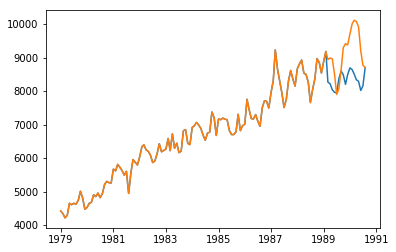

In [77]:
plt.plot(example[['Forecast', 'value']])
plt.show()